<a href="https://colab.research.google.com/github/alamwasim/solar-irradiation-prediction/blob/main/Solar_Irradiation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 7.6MB/s 
     |████████████████████████████████| 1.6MB 14.7MB/s 
     |████████████████████████████████| 266kB 28.1MB/s 
     |████████████████████████████████| 157.5MB 81kB/s 
     |████████████████████████████████| 13.9MB 49.0MB/s 
     |████████████████████████████████| 1.8MB 52.5MB/s 
     |████████████████████████████████| 174kB 55.2MB/s 
     |████████████████████████████████| 66.3MB 117kB/s 
     |████████████████████████████████| 276kB 51.3MB/s 
     |████████████████████████████████| 6.8MB 41.1MB/s 
     |████████████████████████████████| 102kB 14.8MB/s 
     |████████████████████████████████| 71kB 11.8MB/s 
     |████████████████████████████████| 604kB 43.1MB/s 
     |████████████████████████████████| 3.1MB 43.5MB/s 
     |████████████████████████████████| 1.1MB 46.3MB/s 
     |████████████████████████████████| 337kB 43.8MB/s 
     |████████████████████████████████| 163kB 56.6MB/s 
     |████████████████████████████████| 153kB 58.

In [ ]:
import pandas as pd
import numpy as np
import pandas_profiling 
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
from pycaret.regression import *

In [ ]:
# Data Source: National Aeronautics and Space Administration (NASA) / Goddard Space Flight Center 
# Columns:
# Temperature (K);Temperature at 2 m above ground
# Relative humidity (%);Relative humidity at 2 m above ground
# Pressure (hPa);Pressure at ground level
# Wind speed (m/s);Wind speed at 10 m above ground
# Wind direction (deg);Wind direction at 10 m above ground (0 means from North
# Rainfall (kg/m2);Rainfall (= rain depth in mm)
# Snowfall (kg/m2);Snowfall
# Snow depth (m);Snow depth
# Short-wave irradiation (Wh/m2);Surface incoming shortwave irradiation (broadband)

In [ ]:
data=pd.read_csv('Weather-Report_Data.csv')

In [ ]:
data.head()

Date UT time  Temperature  Relative Humidity  Pressure  Wind speed  \
0  2020-08-01    1:00       299.19              87.49    966.61        2.92   
1  2020-08-01    2:00       299.79              84.17    967.04        3.17   
2  2020-08-01    3:00       301.59              73.58    967.40        3.29   
3  2020-08-01    4:00       303.53              63.50    967.64        2.96   
4  2020-08-01    5:00       305.04              57.71    967.66        2.62   

   Wind direction  Rainfall  Snowfall  Snow depth  Short-wave irradiation  
0          215.54  0.191280         0           0                  5.9481  
1          220.26  0.145520         0           0                 91.9841  
2          230.20  0.156297         0           0                260.9556  
3          235.27  0.156699         0           0                445.4368  
4          231.35  0.157347         0           0                590.8749

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1464 non-null   object 
 1   UT time                 1464 non-null   object 
 2   Temperature             1464 non-null   float64
 3   Relative Humidity       1464 non-null   float64
 4   Pressure                1464 non-null   float64
 5   Wind speed              1464 non-null   float64
 6   Wind direction          1464 non-null   float64
 7   Rainfall                1464 non-null   float64
 8   Snowfall                1464 non-null   int64  
 9   Snow depth              1464 non-null   int64  
 10  Short-wave irradiation  1464 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 125.9+ KB


In [ ]:
data.Date=pd.to_datetime(data['Date'])
data['Time']=pd.to_datetime(data['UT time'],format='%H:%M').dt.time
data['hour']=data['Time'].apply(lambda x: x.hour)
data['month']=data['Date'].apply(lambda x: x.month)
data['week']=data['Date'].apply(lambda x: x.week)

In [ ]:
data['Date_timestamp']=data.apply(lambda x: pd.to_datetime( str(x['Date']).split(" ")[0] +" "+ str(x['UT time']),format='%Y-%m-%d %H:%M'),axis=1)
data.set_index('Date_timestamp',inplace=True)

In [ ]:
data.head()

Date UT time  Temperature  Relative Humidity  \
Date_timestamp                                                           
2020-08-01 01:00:00 2020-08-01    1:00       299.19              87.49   
2020-08-01 02:00:00 2020-08-01    2:00       299.79              84.17   
2020-08-01 03:00:00 2020-08-01    3:00       301.59              73.58   
2020-08-01 04:00:00 2020-08-01    4:00       303.53              63.50   
2020-08-01 05:00:00 2020-08-01    5:00       305.04              57.71   

                     Pressure  Wind speed  Wind direction  Rainfall  Snowfall  \
Date_timestamp                                                                  
2020-08-01 01:00:00    966.61        2.92          215.54  0.191280         0   
2020-08-01 02:00:00    967.04        3.17          220.26  0.145520         0   
2020-08-01 03:00:00    967.40        3.29          230.20  0.156297         0   
2020-08-01 04:00:00    967.64        2.96          235.27  0.156699         0   
2020-08-01 05:00:00    967.66        2.62          231.35  0.157347         0   

                     Snow depth  Short-wave irradiation      Time  hour  \
Date_timestamp                                                            
2020-08-01 01:00:00           0                  5.9481  01:00:00     1   
2020-08-01 02:00:00           0                 91.9841  02:00:00     2   
2020-08-01 03:00:00           0                260.9556  03:00:00     3   
2020-08-01 04:00:00           0                445.4368  04:00:00     4   
2020-08-01 05:00:00           0                590.8749  05:00:00     5   

                     month  week  
Date_timestamp                    
2020-08-01 01:00:00      8    31  
2020-08-01 02:00:00      8    31  
2020-08-01 03:00:00      8    31  
2020-08-01 04:00:00      8    31  
2020-08-01 05:00:00      8    31

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1464 entries, 2020-08-01 01:00:00 to 2020-09-30 00:00:00
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1464 non-null   datetime64[ns]
 1   UT time                 1464 non-null   object        
 2   Temperature             1464 non-null   float64       
 3   Relative Humidity       1464 non-null   float64       
 4   Pressure                1464 non-null   float64       
 5   Wind speed              1464 non-null   float64       
 6   Wind direction          1464 non-null   float64       
 7   Rainfall                1464 non-null   float64       
 8   Snowfall                1464 non-null   int64         
 9   Snow depth              1464 non-null   int64         
 10  Short-wave irradiation  1464 non-null   float64       
 11  Time                    1464 non-null   object        
 12  hour        

In [ ]:
data.profile_report()

In [ ]:
print(data.Date.max(),data.Date.min())
train=data.loc[data.Date<='2020-09-16']
crossValidate=data.loc[(data.Date>'2020-09-16') & (data.Date<='2020-09-23')]
test=data.loc[data.Date>'2020-09-23']

2020-09-30 00:00:00 2020-08-01 00:00:00


In [ ]:
print(train.Date.max(),train.Date.min())
print(crossValidate.Date.max(),crossValidate.Date.min())
print(test.Date.max(),test.Date.min())

2020-09-16 00:00:00 2020-08-01 00:00:00
2020-09-23 00:00:00 2020-09-17 00:00:00
2020-09-30 00:00:00 2020-09-24 00:00:00


In [ ]:
train.columns

Index(['Date', 'UT time', 'Temperature', 'Relative Humidity', 'Pressure',
       'Wind speed', 'Wind direction', 'Rainfall', 'Snowfall', 'Snow depth',
       'Short-wave irradiation', 'Time', 'hour', 'month', 'week'],
      dtype='object')

In [ ]:
 sel_col=['Temperature', 'Relative Humidity', 'Pressure',
       'Wind speed', 'Wind direction', 'Rainfall', 'hour', 'week','Short-wave irradiation']

In [ ]:
reg1 = setup(train[sel_col], target = 'Short-wave irradiation',
             numeric_features=['Temperature', 'Relative Humidity', 'Pressure','Wind speed', 'Wind direction', 'Rainfall', 'hour', 'week'],
        session_id = 123, silent = True) #silent is set to True for unattended run during kernel execution

Description                   Value
0                               session_id                     123
1                                   Target  Short-wave irradiation
2                            Original Data               (1128, 9)
3                           Missing Values                   False
4                         Numeric Features                       8
5                     Categorical Features                       0
6                         Ordinal Features                   False
7                High Cardinality Features                   False
8                  High Cardinality Method                    None
9                    Transformed Train Set                (789, 8)
10                    Transformed Test Set                (339, 8)
11                      Shuffle Train-Test                    True
12                     Stratify Train-Test                   False
13                          Fold Generator                   KFold
14                             Fold Number                      10
15                                CPU Jobs                      -1
16                                 Use GPU                   False
17                          Log Experiment                   False
18                         Experiment Name        reg-default-name
19                                     USI                    9a40
20                         Imputation Type                  simple
21          Iterative Imputation Iteration                    None
22                         Numeric Imputer                    mean
23      Iterative Imputation Numeric Model                    None
24                     Categorical Imputer                constant
25  Iterative Imputation Categorical Model                    None
26           Unknown Categoricals Handling          least_frequent
27                               Normalize                   False
28                        Normalize Method                    None
29                          Transformation                   False
30                   Transformation Method                    None
31                                     PCA                   False
32                              PCA Method                    None
33                          PCA Components                    None
34                     Ignore Low Variance                   False
35                     Combine Rare Levels                   False
36                    Rare Level Threshold                    None
37                         Numeric Binning                   False
38                         Remove Outliers                   False
39                      Outliers Threshold                    None
40                Remove Multicollinearity                   False
41             Multicollinearity Threshold                    None
42                              Clustering                   False
43                    Clustering Iteration                    None
44                     Polynomial Features                   False
45                       Polynomial Degree                    None
46                    Trignometry Features                   False
47                    Polynomial Threshold                    None
48                          Group Features                   False
49                       Feature Selection                   False
50            Features Selection Threshold                    None
51                     Feature Interaction                   False
52                           Feature Ratio                   False
53                   Interaction Threshold                    None
54                        Transform Target                   False
55                 Transform Target Method                 box-cox

**List of avaialble mregression models in Pycaret**

In [ ]:
models()

Name  ...  Turbo
ID                                           ...       
lr                        Linear Regression  ...   True
lasso                      Lasso Regression  ...   True
ridge                      Ridge Regression  ...   True
en                              Elastic Net  ...   True
lar                  Least Angle Regression  ...   True
llar           Lasso Least Angle Regression  ...   True
omp             Orthogonal Matching Pursuit  ...   True
br                           Bayesian Ridge  ...   True
ard       Automatic Relevance Determination  ...  False
par            Passive Aggressive Regressor  ...   True
ransac              Random Sample Consensus  ...  False
tr                       TheilSen Regressor  ...  False
huber                       Huber Regressor  ...   True
kr                             Kernel Ridge  ...  False
svm               Support Vector Regression  ...  False
knn                   K Neighbors Regressor  ...   True
dt                  Decision Tree Regressor  ...   True
rf                  Random Forest Regressor  ...   True
et                    Extra Trees Regressor  ...   True
ada                      AdaBoost Regressor  ...   True
gbr             Gradient Boosting Regressor  ...   True
mlp                           MLP Regressor  ...  False
xgboost           Extreme Gradient Boosting  ...   True
lightgbm    Light Gradient Boosting Machine  ...   True
catboost                 CatBoost Regressor  ...   True

[25 rows x 3 columns]

**Comparing all regression models and selecting top5 model**

In [ ]:
top5=compare_models( n_select = 5,fold = 10,  round = 4,  sort = 'R2', turbo = False)
top5_summary=pull()
top5_model_name=top5_summary.index.to_list()[:5]

Model       MAE          MSE      RMSE  \
catboost                 CatBoost Regressor   23.6441    1520.9294   38.7225   
et                    Extra Trees Regressor   26.8244    2345.1997   48.0710   
lightgbm    Light Gradient Boosting Machine   28.9265    2434.7759   49.0927   
xgboost           Extreme Gradient Boosting   28.0246    2519.4193   49.9184   
gbr             Gradient Boosting Regressor   33.8933    2987.3404   54.0148   
rf                  Random Forest Regressor   30.7158    3222.4492   56.3373   
ada                      AdaBoost Regressor   58.9867    6050.9607   77.2863   
dt                  Decision Tree Regressor   39.9290    6535.6566   80.3526   
knn                   K Neighbors Regressor   71.8146   15493.9315  122.8149   
br                           Bayesian Ridge  110.5523   19956.9858  140.5258   
lr                        Linear Regression  110.7251   19955.9807  140.5434   
lar                  Least Angle Regression  110.7252   19955.9997  140.5435   
ridge                      Ridge Regression  110.7200   19955.6168  140.5416   
lasso                      Lasso Regression  110.6696   19960.2845  140.5405   
ard       Automatic Relevance Determination  110.8249   20022.0980  140.7355   
en                              Elastic Net  110.8249   20259.5074  141.5145   
huber                       Huber Regressor  111.7756   22124.0887  147.9049   
kr                             Kernel Ridge  115.6186   22255.1654  148.5278   
tr                       TheilSen Regressor  119.0467   23678.3373  153.2561   
llar           Lasso Least Angle Regression  117.8460   24347.6146  155.1685   
mlp                           MLP Regressor  120.4405   25846.9663  159.9752   
omp             Orthogonal Matching Pursuit  135.2002   36011.7456  188.8887   
par            Passive Aggressive Regressor  203.1498   69669.3803  238.7458   
ransac              Random Sample Consensus  196.6496   91569.1371  299.0511   
svm               Support Vector Regression  221.2571  121073.0401  346.0263   

              R2   RMSLE       MAPE  TT (Sec)  
catboost  0.9809  1.1525    65.1250     1.727  
et        0.9708  0.5036     4.7097     0.427  
lightgbm  0.9692  1.1852    37.2746     0.073  
xgboost   0.9687  0.6495    17.9761     7.939  
gbr       0.9623  1.4676    62.4878     0.133  
rf        0.9590  0.2889     2.3064     0.524  
ada       0.9231  2.3360   456.2337     0.103  
dt        0.9168  0.2684     1.7737     0.014  
knn       0.7984  1.4308    68.3701     0.061  
br        0.7519  2.9226   943.8109     0.012  
lr        0.7519  2.9284   932.5283     0.099  
lar       0.7519  2.9284   932.5346     0.013  
ridge     0.7519  2.9283   932.8782     0.012  
lasso     0.7519  2.9269   939.0432     0.012  
ard       0.7512  2.9320   923.6981     0.015  
en        0.7482  2.9156   971.0605     0.012  
huber     0.7246  2.8018   895.4984     0.038  
kr        0.7215  2.9081  1224.8932     0.087  
tr        0.7067  2.9300   867.8724     0.816  
llar      0.6989  2.8392   833.5813     0.013  
mlp       0.6787  2.8403   757.5284     1.028  
omp       0.5517  2.6896   373.9773     0.012  
par       0.1768  3.4004  1146.8229     0.012  
ransac   -0.1186  2.8872   346.5302     0.056  
svm      -0.4805  2.9930   274.1163     0.043

**Feature Importance**
---
Findings 
*   hour and relative humidity is of high importance for catboost algorithm
*   Wind Direction and wind Speed of very low importance





Feature Importance by Catboost Algorithm

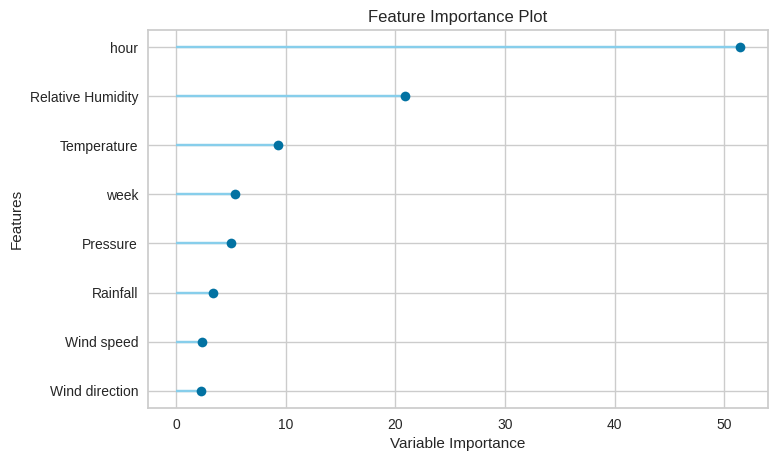

In [ ]:
plot_model(top5[0], plot = 'feature')

Feature Importance by Extra Tree Regressor Algorithm which is the best model for this data

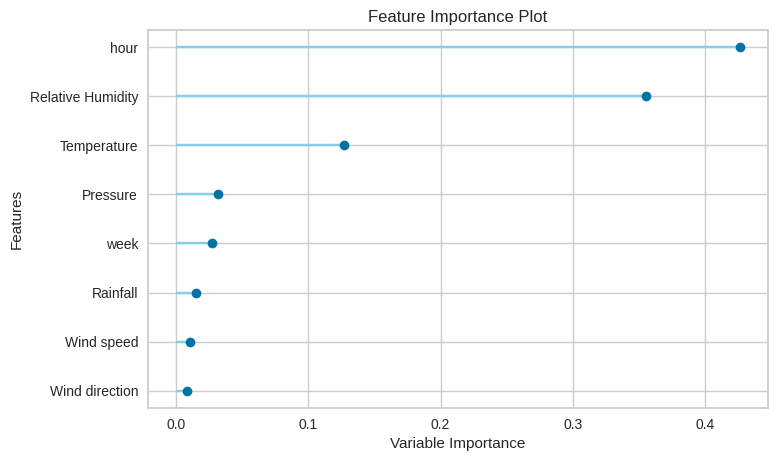

In [ ]:
plot_model(top5[1], plot = 'feature')

**Tuning All top 5 models**
<br> However their performance seems to be less that previous mode.**Point for investigation**

In [ ]:
tuned_top5 = [tune_model(i) for i in top5]

MAE        MSE     RMSE      R2   RMSLE      MAPE
0     24.9355  1542.7282  39.2776  0.9834  1.4570    3.1783
1     28.0888  1904.7195  43.6431  0.9758  1.1409    0.3314
2     33.0899  2875.9135  53.6275  0.9654  1.3308  158.6196
3     30.2037  2406.2080  49.0531  0.9767  1.5914    2.1330
4     31.9029  2736.2712  52.3094  0.9729  1.3667   39.0587
5     26.1202  1714.2266  41.4032  0.9757  1.6241   72.9894
6     33.4825  2533.2849  50.3317  0.9719  1.4272    0.4164
7     24.1272  1521.6208  39.0080  0.9757  1.2896    0.7773
8     30.4689  2765.8576  52.5914  0.9597  1.4642   37.4511
9     36.5765  3098.7880  55.6668  0.9524  1.5681    1.5852
Mean  29.8996  2309.9618  47.6912  0.9709  1.4260   31.6540
SD     3.8413   558.6158   5.9593  0.0087  0.1420   48.3881



---
**Creating Simple Linear Regression Model**


In [ ]:
lr=create_model('lr')
lr_tuned=tune_model(lr)
lr_pred=predict_model(lr_tuned,crossValidate)

MAE         MSE      RMSE      R2   RMSLE       MAPE
0     103.7701  16778.9258  129.5335  0.8192  3.0719    29.8628
1     111.5947  20499.3652  143.1760  0.7398  2.6964     1.1206
2     128.0155  25285.2949  159.0135  0.6959  3.0055  6109.6514
3     124.2466  23929.1836  154.6906  0.7681  3.2285    24.7852
4     123.9232  26230.9668  161.9598  0.7398  2.8214   284.0822
5     116.8512  18816.3574  137.1727  0.7332  3.2669  1268.8346
6      98.8241  16293.6650  127.6466  0.8192  2.6810     2.3437
7     110.8581  21857.1289  147.8416  0.6510  2.7713     6.7426
8      94.2721  15248.5127  123.4849  0.7778  3.0063  1593.6284
9      94.8952  14620.2080  120.9141  0.7752  2.7344     4.3227
Mean  110.7251  19955.9608  140.5433  0.7519  2.9284   932.5374
SD     11.8557   4036.1952   14.2666  0.0495  0.2064  1812.8280

#Testing All trained model on crosValidation data set


pred_eval is dataframe having evaluation on test dataset for various model

In [ ]:
pred_eval=pd.DataFrame()
pred_eval['lr']=get_metrics()['Score Function'].apply(lambda x :x(lr_pred['Short-wave irradiation'],lr_pred['Label']))

In [ ]:
for model,name in zip(top5,top5_model_name):
  pred=predict_model(model,crossValidate[sel_col])
  pred_eval[name]=get_metrics()['Score Function'].apply(lambda x :x(pred['Short-wave irradiation'],pred['Label']))

In [ ]:
for model,name in zip(tuned_top5,top5_model_name):
  pred=predict_model(model,crossValidate[sel_col])
  pred_eval[name+'_tuned']=get_metrics()['Score Function'].apply(lambda x :x(pred['Short-wave irradiation'],pred['Label']))

**Extra Tree Regressor** and **Random Forest regressor** model seems to be top performing on crossValidation dataset

In [ ]:
pred_eval

lr     catboost  ...  xgboost_tuned    gbr_tuned
ID                                ...                            
mae      132.133294    44.451991  ...      37.340988    47.581790
mse    27540.455197  4345.551696  ...    4038.805003  4388.219069
rmse   27540.455197  4345.551696  ...    4038.805003  4388.219069
r2         0.694980     0.951872  ...       0.955269     0.951399
rmsle      3.229000     2.003393  ...       1.379636     2.176118
mape   21343.047991   494.635564  ...     288.025317  1253.841587

[6 rows x 11 columns]

**Plotting Actual vs Predicted Irradiation**

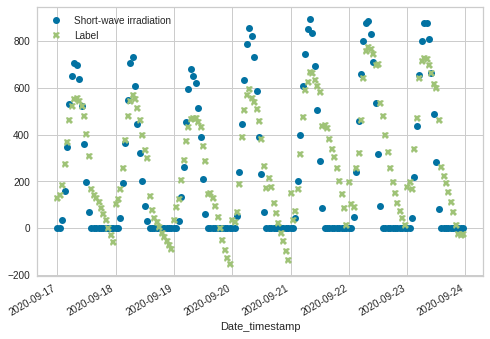

In [ ]:
#Linear Regression
lr_pred[['Short-wave irradiation','Label']].plot(style=['o','X'])

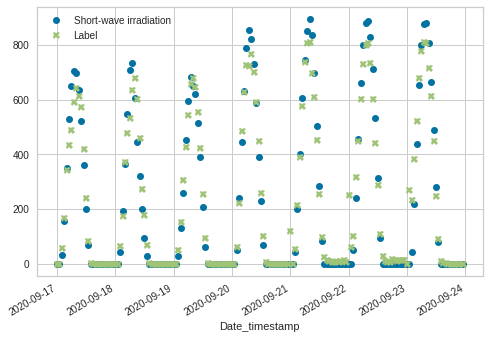

In [ ]:
#Extra Tree Regressor
predict_model(top5[1],crossValidate[sel_col])[['Short-wave irradiation','Label']].plot(style=['o','X'])

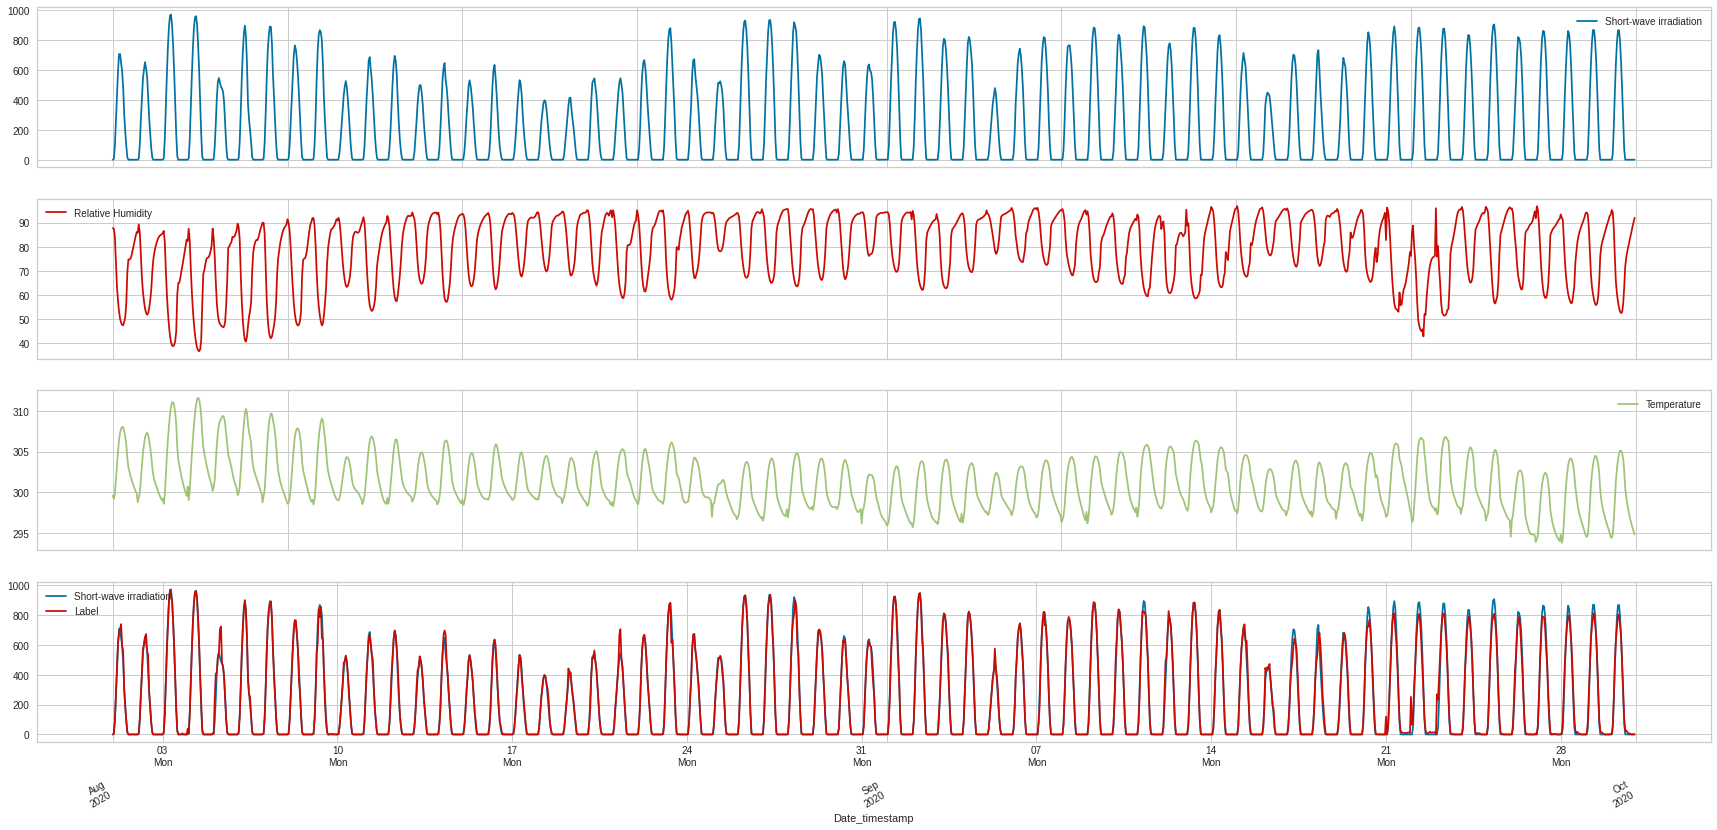

In [ ]:
fig, ax = plt.subplots(4)
ax[0].figure.set_size_inches(30, 15)
data[['Short-wave irradiation']].plot(ax=ax[0],sharex=True)
data[['Relative Humidity']].plot(ax=ax[1],color='r')
data[['Temperature']].plot(ax=ax[2],color='g')
predict_model(top5[1],data[sel_col])[['Short-wave irradiation','Label']].plot(ax=ax[3],color=['b','r'])
ax[3].xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0),interval=1))
ax[3].xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax[3].xaxis.grid(True, which="minor")
ax[3].xaxis.set_major_locator(dates.MonthLocator())
ax[3].xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

**Scope for Advanced Model**
*   Blend Model. Voting Technique
*   Stack Model. Combining more than 1 model on some other model(LR)



In [ ]:
# blender = blend_models(tuned_top5)
# stacker = stack_models(tuned_top5)